<a href="https://colab.research.google.com/github/Salma-Abouzeid/Regmodel-flights-dataset-/blob/main/Copy_of_Regression_Task_(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x=np.arange(50,150)
x=x.reshape(-1,1) #turn into a 2D frame
print(x)
y=2*x+2
y=2*x+2 + (np.random.randn(100, 1) * 2) #add noise
print(y)

[[ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]
 [143]
 [144]
 [145]
 [146]
 [147]
 [148]
 [149]]
[[104.77139073]
 [105.34017667]
 [107.41535886]
 [109.61046475]
 [111.32741671]
 [113.50849416]
 [115.38451272]
 [118.16027541]
 [119.47559326]
 [118.90724812]
 [122.94457748]
 [123.01369705]
 [124.36439598]
 [127.69796883]
 [130.44372411]
 [134.64175293]
 [133.79599053]
 [138.35578909]
 [137.23128

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44,shuffle=True)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print('Coefficient:',model.coef_)
print('Intercept:',model.intercept_)

Coefficient: [[1.99603608]]
Intercept: [2.70769583]


In [3]:
predictions=model.predict(x_test)
#Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('For Training')
print('MAE:',mean_absolute_error(y_train,model.predict(x_train)))
print("MSE:",mean_squared_error(y_train,model.predict(x_train)))
#As expected, MSE penalises the error which helps the model trains better but is sensitive to outliers
print("R2:",r2_score(y_train,model.predict(x_train)))
#R2 score is almost one which means the model is almost perfect
print('For Testing')
print('MAE:',mean_absolute_error(y_test,predictions))
print("MSE:",mean_squared_error(y_test,predictions))
print("R2:",r2_score(y_test,predictions))
#Taking MAE in consideration, The model performs slightly better in training.
#It could be suffering from overfitting (poorer testing scores as it can not generalise the test data) but not for sure.

For Training
MAE: 1.288800389985093
MSE: 2.5207998078930896
R2: 0.9992630116416547
For Testing
MAE: 1.2373355988770243
MSE: 2.0643334307514083
R2: 0.9992766521640422


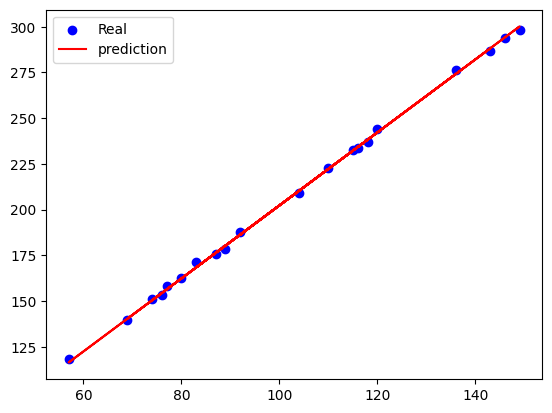

In [4]:
plt.scatter(x_test,y_test,color='blue',label='Real')
plt.plot(x_test,predictions,color='red',label='prediction')
plt.legend()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [5]:
x1=np.arange(50,150).reshape(-1,1)
x2=np.arange(150,250).reshape(-1,1)
y=2*x1+3*x2+4 #y=2x1+3x2+4
y=2*x1+3*x2+4 + (np.random.randn(100, 1) * 2) #Noise added
x=np.hstack((x1,x2)) #Combine features into a single input matrix
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44,shuffle=True)
model=LinearRegression()
model.fit(x_train,y_train)
print('Coefficients:',model.coef_)
print('Intercept:',model.intercept_)
#The coeff have an error of +/-0.5 and the intercept point is way off.. probably due to 3 things: The small size of dataset, the noise added, the split of data

Coefficients: [[2.50672534 2.50672534]]
Intercept: [51.7467543]


In [6]:
predictions=model.predict(x_test)
#Evaluation
print('For Training')
print('MAE:',mean_absolute_error(y_train,model.predict(x_train)))
print('MSE:',mean_squared_error(y_train,model.predict(x_train)))
print('R2:',r2_score(y_train,model.predict(x_train)))
print('For Testing')
print('MAE:',mean_absolute_error(y_test,model.predict(x_test)))
print('MSE:',mean_squared_error(y_test,model.predict(x_test)))
print('R2:',r2_score(y_test,model.predict(x_test)))
#Taking both MSE&MAE in consideration, The model performs slightly better in testing.
#It could be suffering from slight underfitting (poorer training scores as it can not understand the data) but not for sure since R2 score is great.

For Training
MAE: 1.7879067183196995
MSE: 5.115328571095882
R2: 0.9997628209884
For Testing
MAE: 2.094364981306012
MSE: 6.242174434602267
R2: 0.9996538632744663


# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



['1' 'x0' 'x0^2']
Coefficients: [[0.         2.0591632  0.99968123]]
Intercept: [0.9264901]


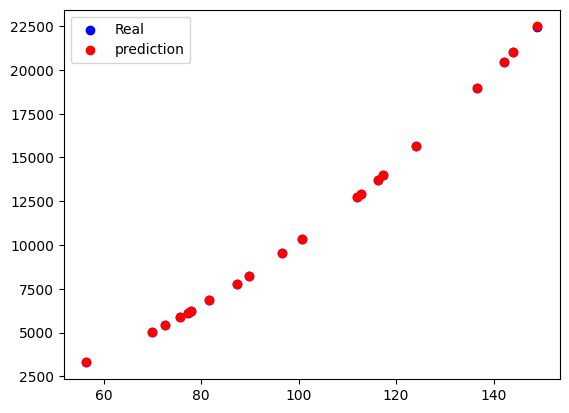

In [7]:
x=np.arange(50,150).reshape(-1,1) + (np.random.randn(100, 1) * 2)
y=(x**2)+2*x+3 + (np.random.randn(100, 1) * 2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44,shuffle=True)
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
model=LinearRegression()
model.fit(x_train_poly,y_train)
print(poly.get_feature_names_out())
print('Coefficients:',model.coef_)
print('Intercept:',model.intercept_)
prediction=model.predict(x_test_poly)
plt.scatter(x_test,y_test,color='blue',label='Real')
plt.scatter(x_test,prediction,color='red',label='prediction')
plt.legend()

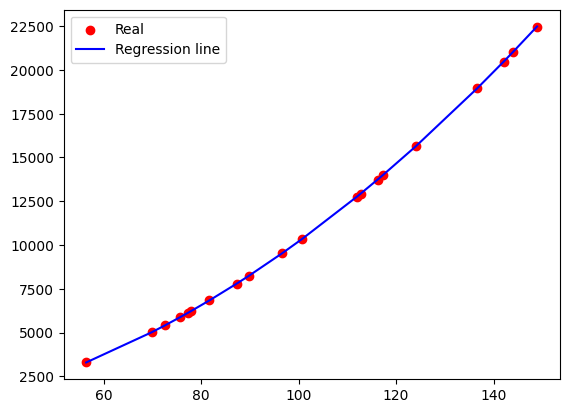

In [8]:
# Sort x_test and predictions by the x values
#.squeeze turns a 2D array of (n samples,1) [1 feature] shape into a 1D array of (n samples, ) shape for plot
sorted_idx = x_test.squeeze().argsort() #.argsort() return indices sorted
x_sorted = x_test.squeeze()[sorted_idx] #sorted data points
y_pred_sorted = prediction[sorted_idx] #sort predicted y values as well,
                                      #makes sure each x-value still aligns with its corresponding predicted y-value after sorting.

plt.scatter(x_test, y_test, color='red', label='Real')
plt.plot(x_sorted, y_pred_sorted, color='blue', label='Regression line')
plt.legend()

In [9]:
print('For Training')
print('MAE:',mean_absolute_error(y_train,model.predict(x_train_poly)))
print('MSE:',mean_squared_error(y_train,model.predict(x_train_poly)))
print('R2:',r2_score(y_train,model.predict(x_train_poly)))
print('For Testing')
print('MAE:',mean_absolute_error(y_test,model.predict(x_test_poly)))
print('MSE:',mean_squared_error(y_test,model.predict(x_test_poly)))
print('R2:',r2_score(y_test,model.predict(x_test_poly)))
#Almost identical values in all metrics, probably no underfitting or overfitting

For Training
MAE: 1.6613338506291313
MSE: 4.329248174489277
R2: 0.9999998782768723
For Testing
MAE: 1.112828283561612
MSE: 1.827691489666736
R2: 0.9999999449638449


## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [10]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-flights-data


In [11]:
os.listdir(path)

['airlines_flights_data.csv']

In [12]:
full_path = os.path.join(path,os.listdir(path)[0])

In [13]:
import pandas as pd
df = pd.read_csv(full_path)

In [14]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### 1. **Exploratory Data Analysis (EDA)**

In [15]:
print(df.info)
print(df.head())
print(df.describe(include='all'))
df=df.drop('index',axis=1) #removing column index as it's redundant

<bound method DataFrame.info of          index   airline   flight source_city departure_time stops  \
0            0  SpiceJet  SG-8709       Delhi        Evening  zero   
1            1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2            2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3            3   Vistara   UK-995       Delhi        Morning  zero   
4            4   Vistara   UK-963       Delhi        Morning  zero   
...        ...       ...      ...         ...            ...   ...   
300148  300148   Vistara   UK-822     Chennai        Morning   one   
300149  300149   Vistara   UK-826     Chennai      Afternoon   one   
300150  300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151  300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152  300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           Mumbai   Economy

# Handling null values


In [16]:
print('null count: ')
print(df.isnull().sum()) #no null values found

null count: 
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


# Handling for duplicates

In [17]:
print('duplicated:')
print(df.duplicated().sum()) #No duplicated data

duplicated:
0


# A new feature

In [18]:
df['route']=df['source_city']+' to '+df['destination_city']
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai to Hyderabad
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai to Hyderabad
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai to Hyderabad
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai to Hyderabad


# Understand feature types

In [19]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  #Categorical data: airline,flight,source city,stops,arrival time,destination city,class
  #Numerical data: duration, days left, price

airline
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
flight
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
source_city
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops
['zero' 'one' 'two_or_more']
arrival_time
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class
['Economy' 'Business']
duration
[ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   6.5  12.42 21.08 28.17 28.25  9.25
 17.92  7.08 13.83  7.58 15.83 24.42  4.17  4.25  5.08 29.33 17.   27.17
 24.75  5.75 12.75 13.75 17.83  5.5  23.83  5.   26.5  12.83  8.92 11.17
 12.17 15.58 15.75  

# DATA VISUALISATION

<Axes: xlabel='price', ylabel='Count'>

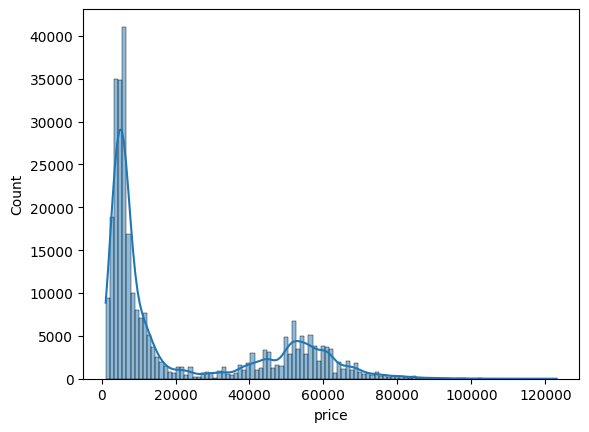

In [20]:
import seaborn as sns
sns.histplot(df['price'],kde=True) #data skewed at the beginning at cheaper prices (right skewed)

<Axes: xlabel='duration', ylabel='Count'>

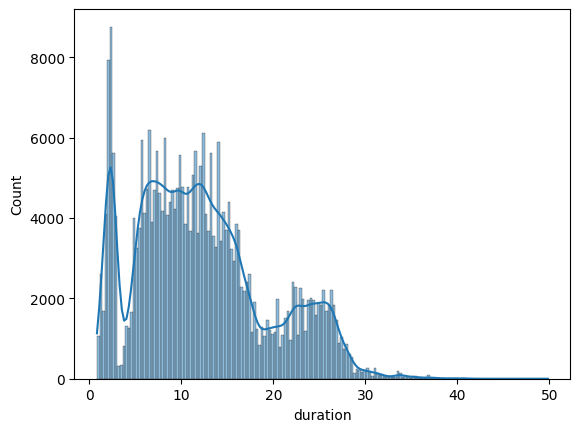

In [21]:
sns.histplot(df['duration'],kde=True) #Almost normally distributed except for some outliers at the beg, so common flight length=8-12h

<Axes: xlabel='days_left', ylabel='Count'>

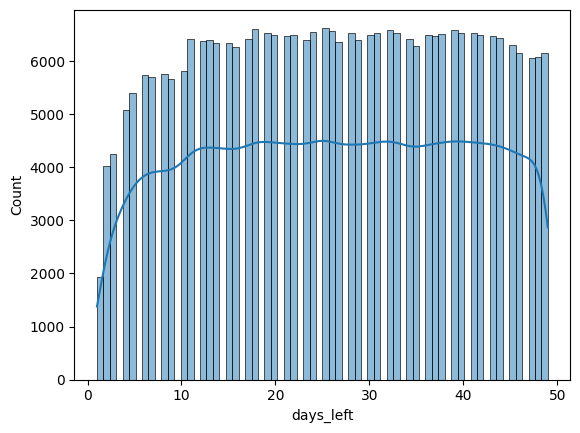

In [22]:
sns.histplot(df['days_left'],kde=True) #No specific distribution

<Axes: ylabel='price'>

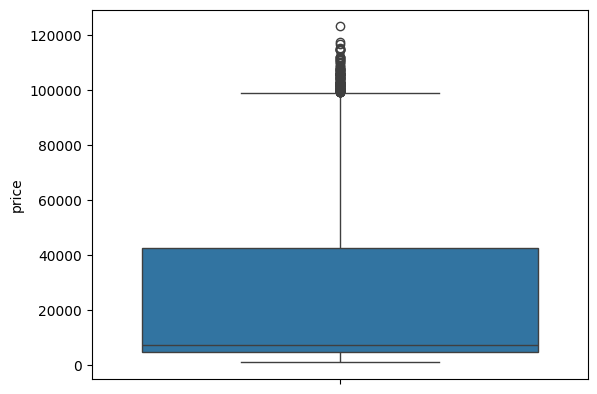

In [23]:
sns.boxplot(df['price']) #outliers shown for expensive prices (I think that's normal)

<Axes: xlabel='class', ylabel='duration'>

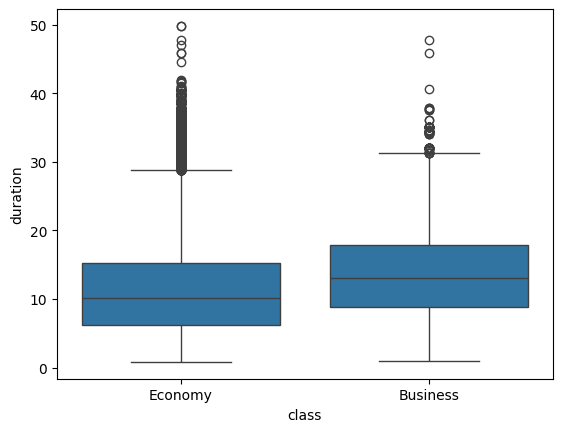

In [24]:
sns.boxplot(x='class',y='duration',data=df) #outliers

<Axes: xlabel='price', ylabel='duration'>

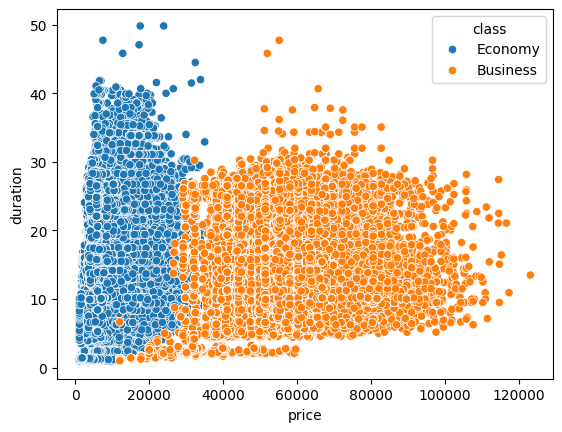

In [25]:
sns.scatterplot(x='price',y='duration',data=df,hue='class') #Business class has higher prices, but both classes have the same durations

<Axes: xlabel='price', ylabel='days_left'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


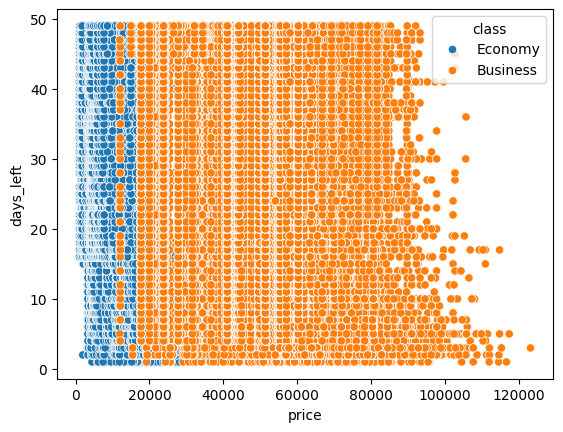

In [26]:
sns.scatterplot(x='price',y='days_left',data=df,hue='class')

Text(0, 0.5, 'Count')

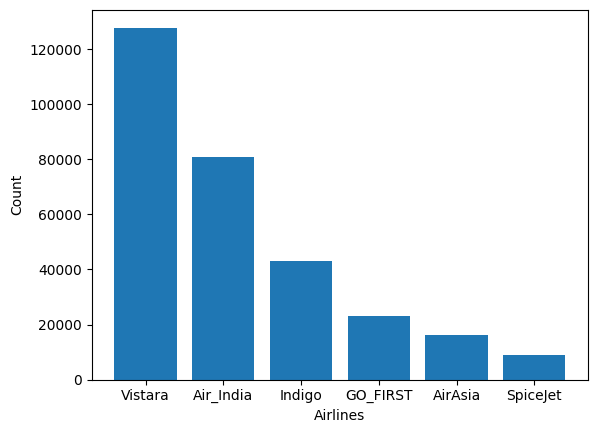

In [27]:
import matplotlib.pyplot as plt
x=df['airline'].value_counts()
plt.bar(x.index,x) #biggest market share to Vistara
plt.xlabel('Airlines')
plt.ylabel('Count')

destination_city  Bangalore  Chennai  Delhi  Hyderabad  Kolkata  Mumbai
source_city                                                            
Bangalore                 0     6410  13756       8928    10028   12939
Chennai                6493        0   9783       6103     6983    9338
Delhi                 14012    10780      0       9328    11934   15289
Hyderabad              7854     6395   8506          0     7987   10064
Kolkata                9824     6653  10506       7897        0   11467
Mumbai                12885    10130  14809      10470    12602       0


<Axes: xlabel='source_city'>

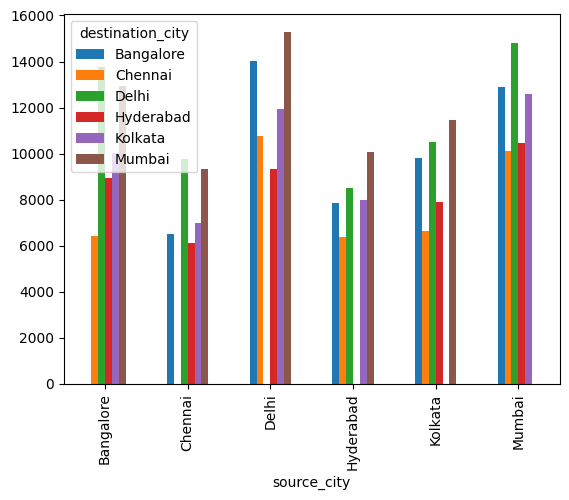

In [28]:
table=pd.crosstab(df['source_city'],df['destination_city'])
print(table)
table.plot(kind='bar')

Text(0, 0.5, 'Count')

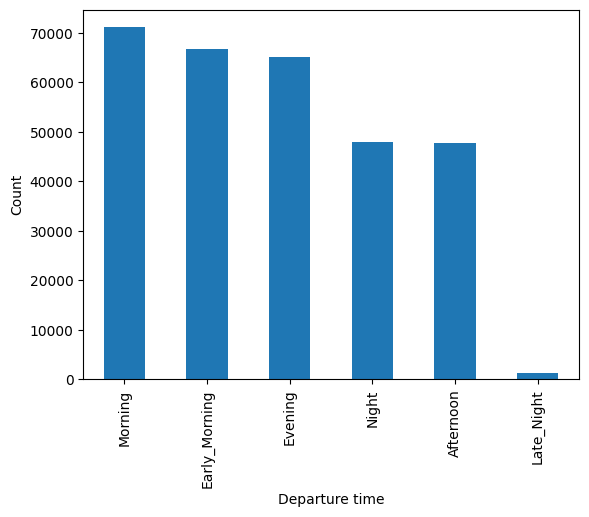

In [29]:
x=df['departure_time'].value_counts()
x.plot(kind='bar')
plt.xlabel('Departure time')
plt.ylabel('Count')

class          Business      Economy
airline                             
AirAsia             NaN  4091.072742
Air_India  47131.039212  7313.682169
GO_FIRST            NaN  5652.007595
Indigo              NaN  5324.216303
SpiceJet            NaN  6179.278881
Vistara    55477.027777  7806.943645


<Axes: xlabel='airline'>

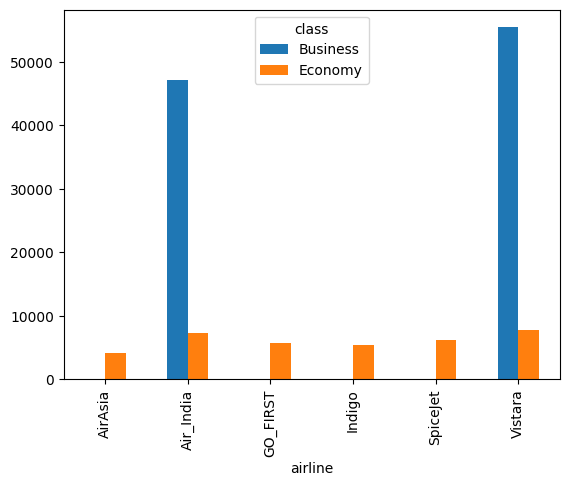

In [30]:
table=pd.pivot_table(df,index='airline',columns='class',values='price',aggfunc='mean')
print(table)
table.plot(kind='bar') #some companies don't offer business class

<Axes: >

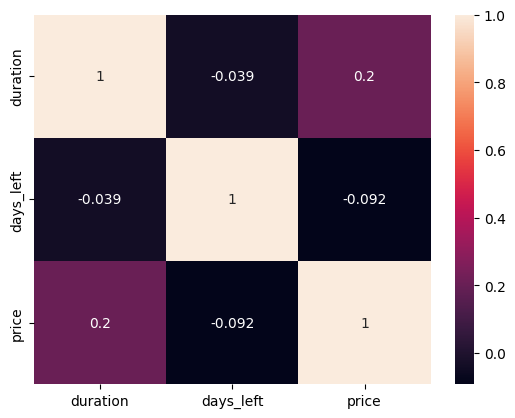

In [31]:
numerical_data=df.select_dtypes(include=['int64','float64'])
corr=numerical_data.corr()
sns.heatmap(data=corr,annot=True)
#Notice how as days left decrease, price increases. And as duration increases, price increases.

#Data Preprocessing: Outliers and Skew data

<Axes: xlabel='price', ylabel='Count'>

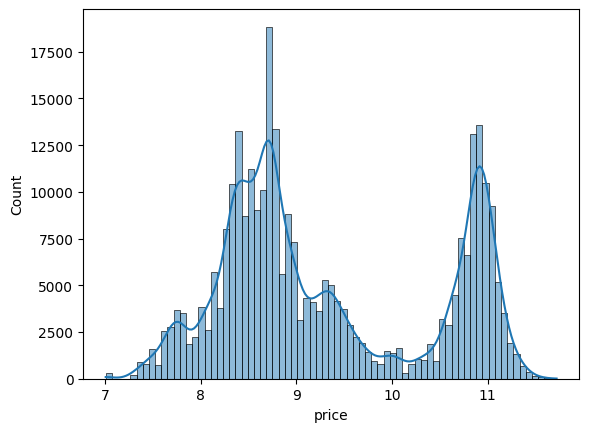

In [32]:
import numpy as np
#For prices, data skewed at the beginning at cheaper prices (right skewed)
from math import log
df['price']=np.log(df['price'])
sns.histplot(df['price'],kde=True)

For duration, domestic flights in India usually last from 20 minutes to 3 hours.Alot of rows display durations with 25+ hours which seems too extreme and odd.
So I'm replacing the whole duration column data points with the min.  

In [33]:
#Outliers in duration showing some flights last >30 hours
df['duration'].describe() #min=0.833
df['duration']=0.833
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,0.833,1,8.691651,Delhi to Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0.833,1,8.691651,Delhi to Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0.833,1,8.692154,Delhi to Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0.833,1,8.691986,Delhi to Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,0.833,1,8.691986,Delhi to Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,0.833,49,11.145695,Chennai to Hyderabad
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,0.833,49,11.252923,Chennai to Hyderabad
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,0.833,49,11.278456,Chennai to Hyderabad
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,0.833,49,11.309401,Chennai to Hyderabad


# Data Preprocessing : Encoding

In [34]:
df=df.drop('route', axis=1)
df = df.drop('flight', axis=1)

# Column 'flights' was dropped from the dataset. It's a categorical feature that requires encoding,
# but using encoding increases the dimensions more than the computational capabilities causing the curse of dimensionality.


In [35]:
#Categorical data: airline,flight,source city,departure time,stops,arrival time,destination city,class
#ordinal data: class, stops >> Ordinal Encoding
#nominal data: airline, flight,source city,departure time,arrival time,destination city >> One-hot encoding

#Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
categorical_cols1=['class','stops']
encoded_df1 = pd.DataFrame()
encoded_array1=oe.fit_transform(df[categorical_cols1])
encoded_df1=pd.DataFrame(encoded_array1,columns=oe.get_feature_names_out(categorical_cols1))
df=df.drop(categorical_cols1,axis=1)
df=pd.concat([df,encoded_df1],axis=1)

#One-Hot encoding
#returns a sparse matrix not a single column, so we can not loop like that
from sklearn.preprocessing import OneHotEncoder
categorical_cols2 = ['airline', 'source_city', 'departure_time',
                    'arrival_time', 'destination_city']

ohe = OneHotEncoder(sparse_output=False, drop='first')
#sparse_output=False makes the encoder return a NumPy array (like a regular 2D array), which is easier
                                                        #to convert to a pandas DataFrame.
#drop='first' drops the first category of each column as it can be deduced from the rest of the categories,
#this is done to avoid large data sets and multicolinearity

#transform the categorical columns
encoded_array2 = ohe.fit_transform(df[categorical_cols2])

# Create a new DataFrame with the encoded columns
encoded_df2 = pd.DataFrame(encoded_array2, columns=ohe.get_feature_names_out(categorical_cols2))

# Drop the original categorical columns
df = df.drop(categorical_cols2, axis=1)

# Concatenate the new one-hot encoded columns
df = pd.concat([df, encoded_df2], axis=1)

In [36]:
df['stops']

,stops
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
300148,0.0
300149,0.0
300150,0.0
300151,0.0


# Data Split

In [37]:
from sklearn.model_selection import train_test_split

x=df.drop('price',axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44,shuffle=True)
#if I wanted a validation test, I'd split the test variables again

##  **Modeling**

In [38]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print('Coefficient:',model.coef_)
print('Intercept:',model.intercept_)

Coefficient: [ 3.82231489e-18 -1.46415889e-02 -1.99610726e+00 -2.06384115e-01
  5.17474508e-01  3.64025177e-01  2.51217403e-01  4.17207719e-01
  6.38058297e-01 -3.73630446e-02 -3.46961998e-02 -9.15332341e-02
  1.57746426e-01 -5.43662399e-02  1.59419085e-02 -1.46301357e-02
  2.83708805e-02  3.17526516e-02 -2.51064074e-02 -6.74244535e-02
  4.07461240e-02  1.78114835e-02 -1.33076910e-02  3.42485152e-02
 -2.42978149e-02 -4.75560114e-02 -9.64718091e-02  1.23079210e-01
 -4.19038860e-02]
Intercept: 10.662166085370234


## Evaluating the Model

In [ ]:
predictions=model.predict(x_test)
#Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('For Training')
print('MAE:',mean_absolute_error(y_train,model.predict(x_train)))
print("MSE:",mean_squared_error(y_train,model.predict(x_train)))

print("R2:",r2_score(y_train,model.predict(x_train)))

print('For Testing')
print('MAE:',mean_absolute_error(y_test,predictions))
print("MSE:",mean_squared_error(y_test,predictions))
print("R2:",r2_score(y_test,predictions))
#! Evaluation metrics show close values, Model doesn't suffer from either underfitting nor overfitting

For Training
MAE: 0.26504599604257956
MSE: 0.11366603093357815
R2: 0.9081716120591978
For Testing
MAE: 0.26420421579054254
MSE: 0.11305772810118911
R2: 0.9088395808594347


# Saving The Model

In [39]:
import pickle
b=pickle.dumps(model)

## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*
